In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests

#### Functions

In [15]:
# GENE ONTOLOGY 

def get_gene_name(ids):
    url = "https://biotools.fr/human/ensembl_symbol_converter/"
    ids_json = json.dumps(ids)
    body = {
        'api': 1,
        'ids': ids_json
    }
    response = requests.post(url, data=body)
    gene_name = []
    if response.status_code == 200:
        output = response.json()
        for i in output:
            gene_name.append(output[i])
    return gene_name


go_enrich_api = "https://toppgene.cchmc.org/API/enrich?pretty=true&as=json"
go_lookup_api = "https://toppgene.cchmc.org/API/lookup?pretty=true&as=json"

def get_Entrez(genes_names):
    params = {
        "Symbols": genes_names
    }
    response = requests.post(go_lookup_api, json=params)
    data = response.json()
    data = data['Genes']
    entrez_id = []
    for i in range(len(data)):
        entrez_id.append(data[i]['Entrez'])
    return entrez_id

def get_GO(entrez_id):
  params = {
  "Genes": entrez_id,
  "Categories": [
    {
      "Type": "GeneOntologyBiologicalProcess",
      "PValue": 0.05,
      "MinGenes": 1,
      "MaxGenes": 1500,
      "MaxResults": 500,
      "Correction": "none"
    }
    # {
    #   "Type": "GeneOntologyMolecularFunction",
    #   "PValue": 0.05,
    #   "MinGenes": 1,
    #   "MaxGenes": 1500,
    #   "MaxResults": 500,
    #   "Correction": "none"
    # },
    # {
    #   "Type": "GeneOntologyCellularComponent",
    #   "PValue": 0.05,
    #   "MinGenes": 1,
    #   "MaxGenes": 1500,
    #   "MaxResults": 500,
    #   "Correction": "none"
    # }

    ]
  }

  response = requests.post(go_enrich_api, json=params)
  data = response.json()
  data = data['Annotations']
  #convert list of dictionaries to a dataframe
  df = pd.DataFrame(data)
  return df

In [72]:
# make a function from the above code
def create_bargraph(df,name,condition):
    # Sort by GeneRatio for better visualization
    df = df.sort_values(by='PValue', ascending=True)

    # Create the plot
    plt.figure(figsize=(15, 15))  # Increase the figure size
    ax = sns.barplot(x='GeneRatio', y='Name', data=df, palette='viridis', hue='PValue', dodge=False, width=0.8)

    # Adding color bar manually
    norm = plt.Normalize(df['PValue'].min(), df['PValue'].max())
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    # Draw the colorbar on the same figure
    cbar = ax.figure.colorbar(sm, ax=ax)
    cbar.set_label('PValue')  # Ensure this label matches the hue variable

    # Remove the redundant legend created by hue
    plt.legend([], [], frameon=False)

    # Adjust title and layout
    plt.title('Bar Chart for '+name+' module with Color Encoding by PValue', fontsize=16)

    # Center y-axis labels
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='center')

    # Center y-axis labels to the left
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right', position=(0,0))  # Align labels to the right and position them

    # Adjust the left margin to make space for labels
    plt.subplots_adjust(left=0.3)

    # Adjust the padding between and around subplots
    plt.tight_layout()

    plt.savefig(f'images/WGCNA_results/{name}_{condition}.png', dpi=1200, bbox_inches='tight')

    plt.show()

In [31]:
def get_module_genes(df,module_name):
    df_temp = df[df['colors'] == module_name]
    return df_temp['gene_id'].tolist()


#### Main code

In [53]:
df_LvN = pd.read_csv("module_df_LvN.csv")
df_LvN = df_LvN.iloc[:,1:]

In [55]:
df_LvN.columns = ["colors","gene_id"]

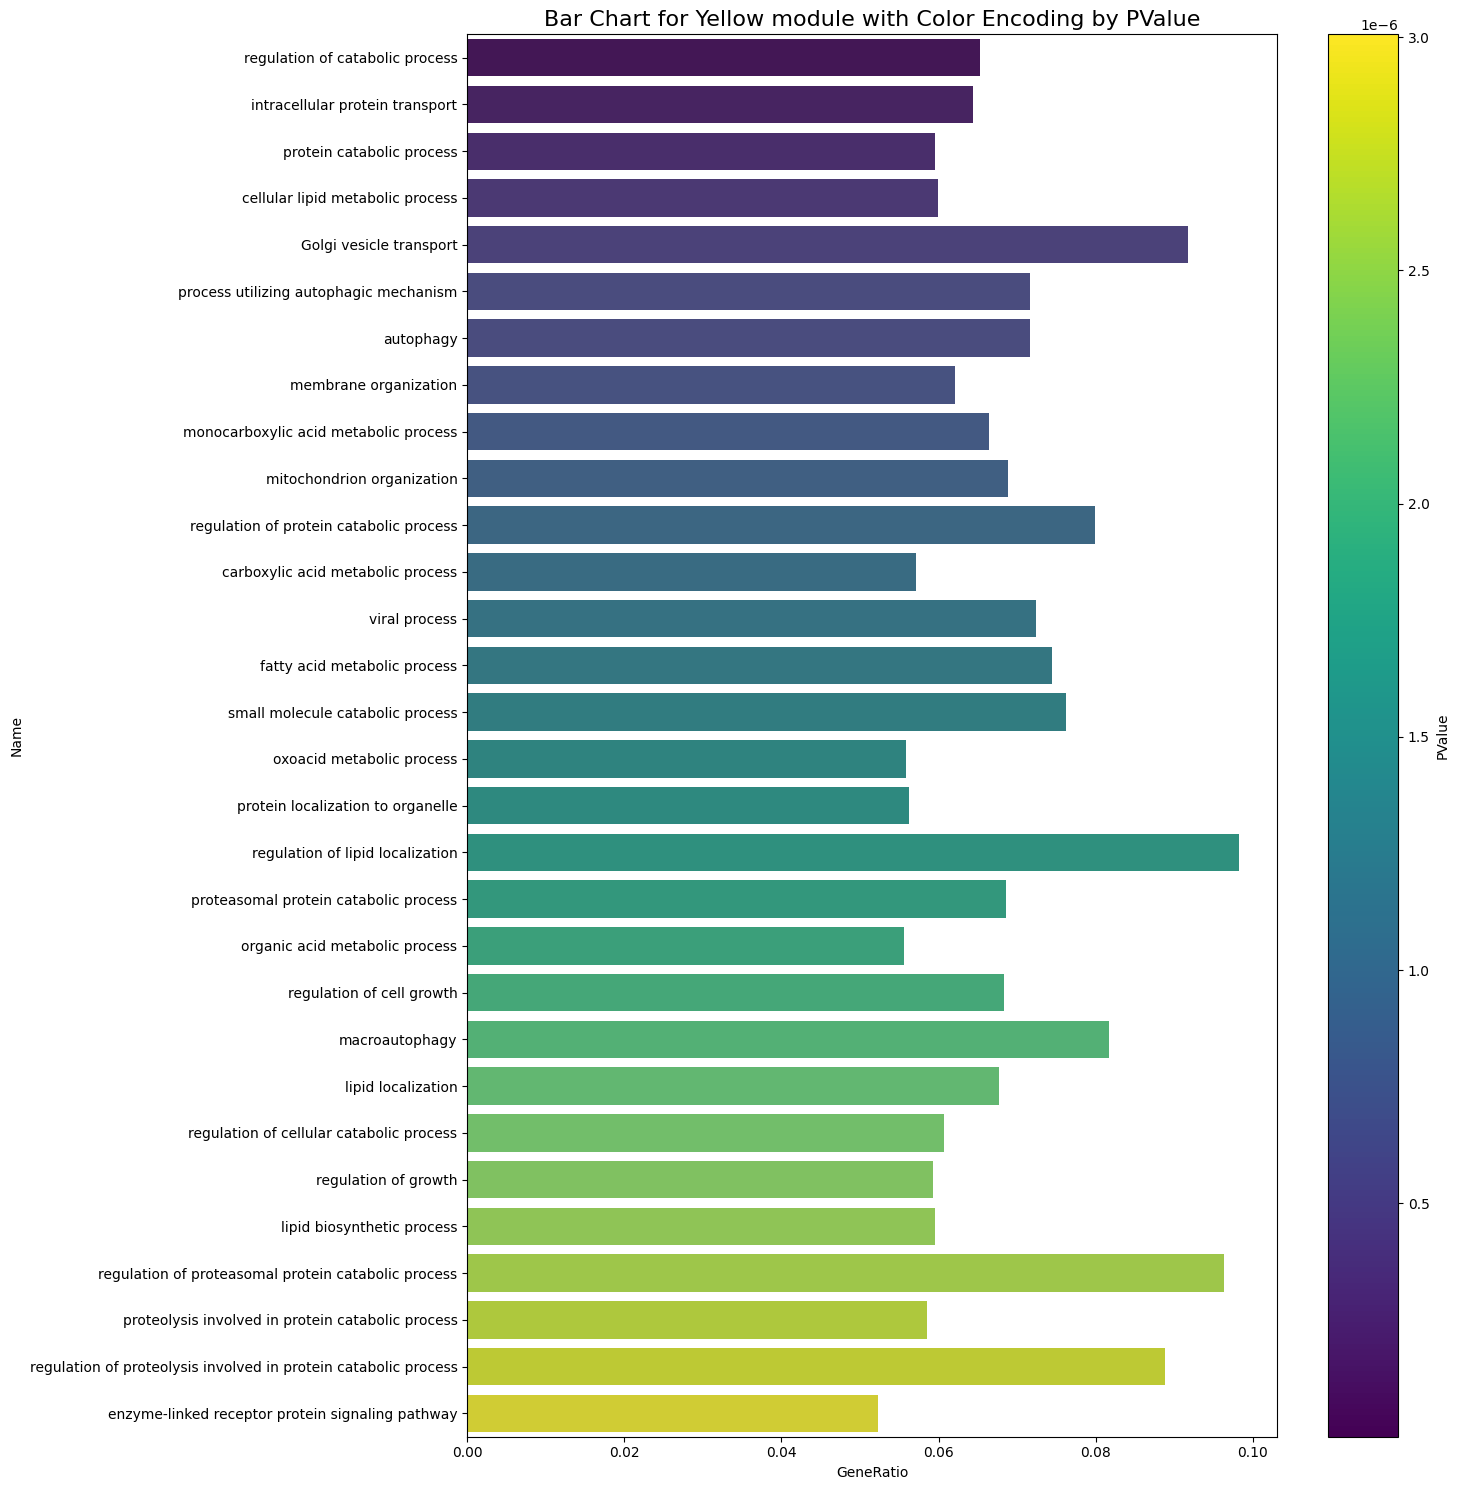

In [73]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'yellow'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"Yellow","LvN")

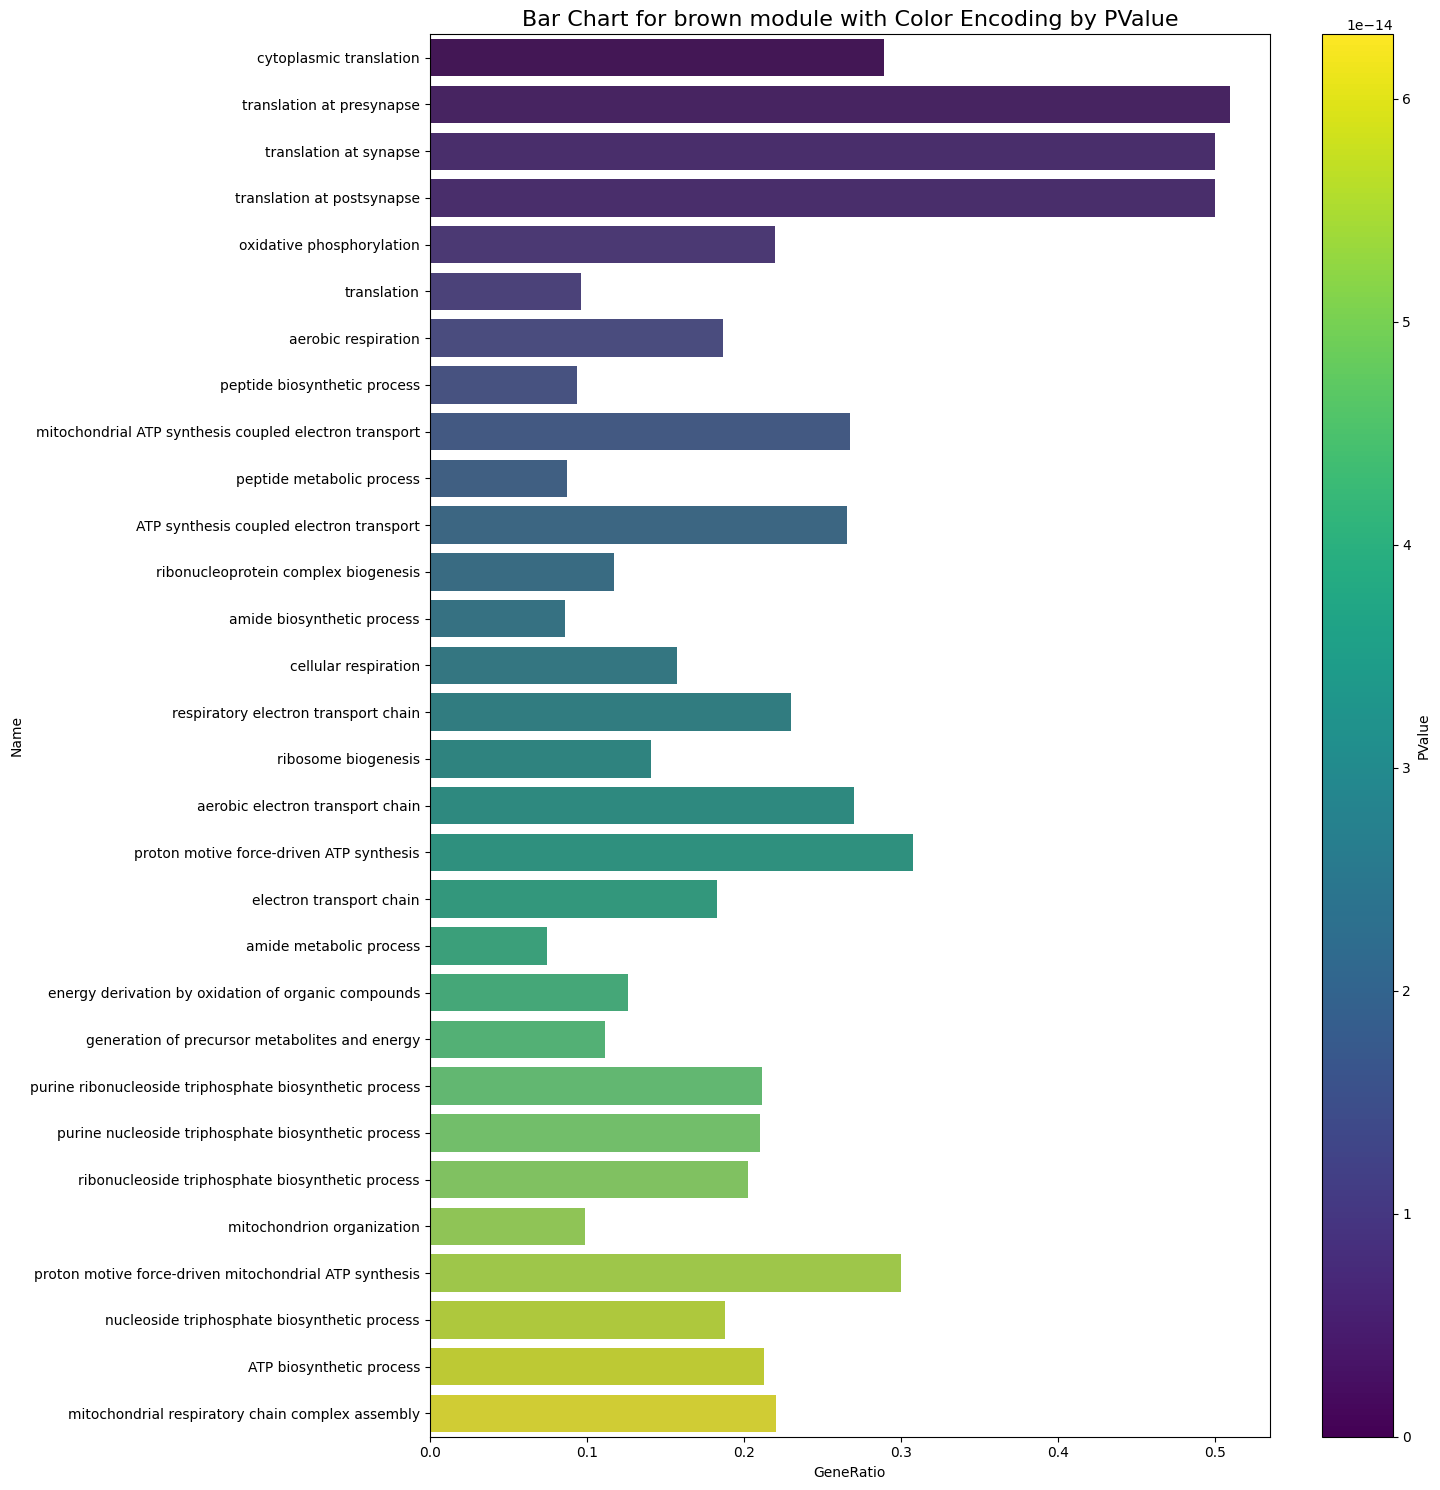

In [74]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'brown'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"brown","LvN")

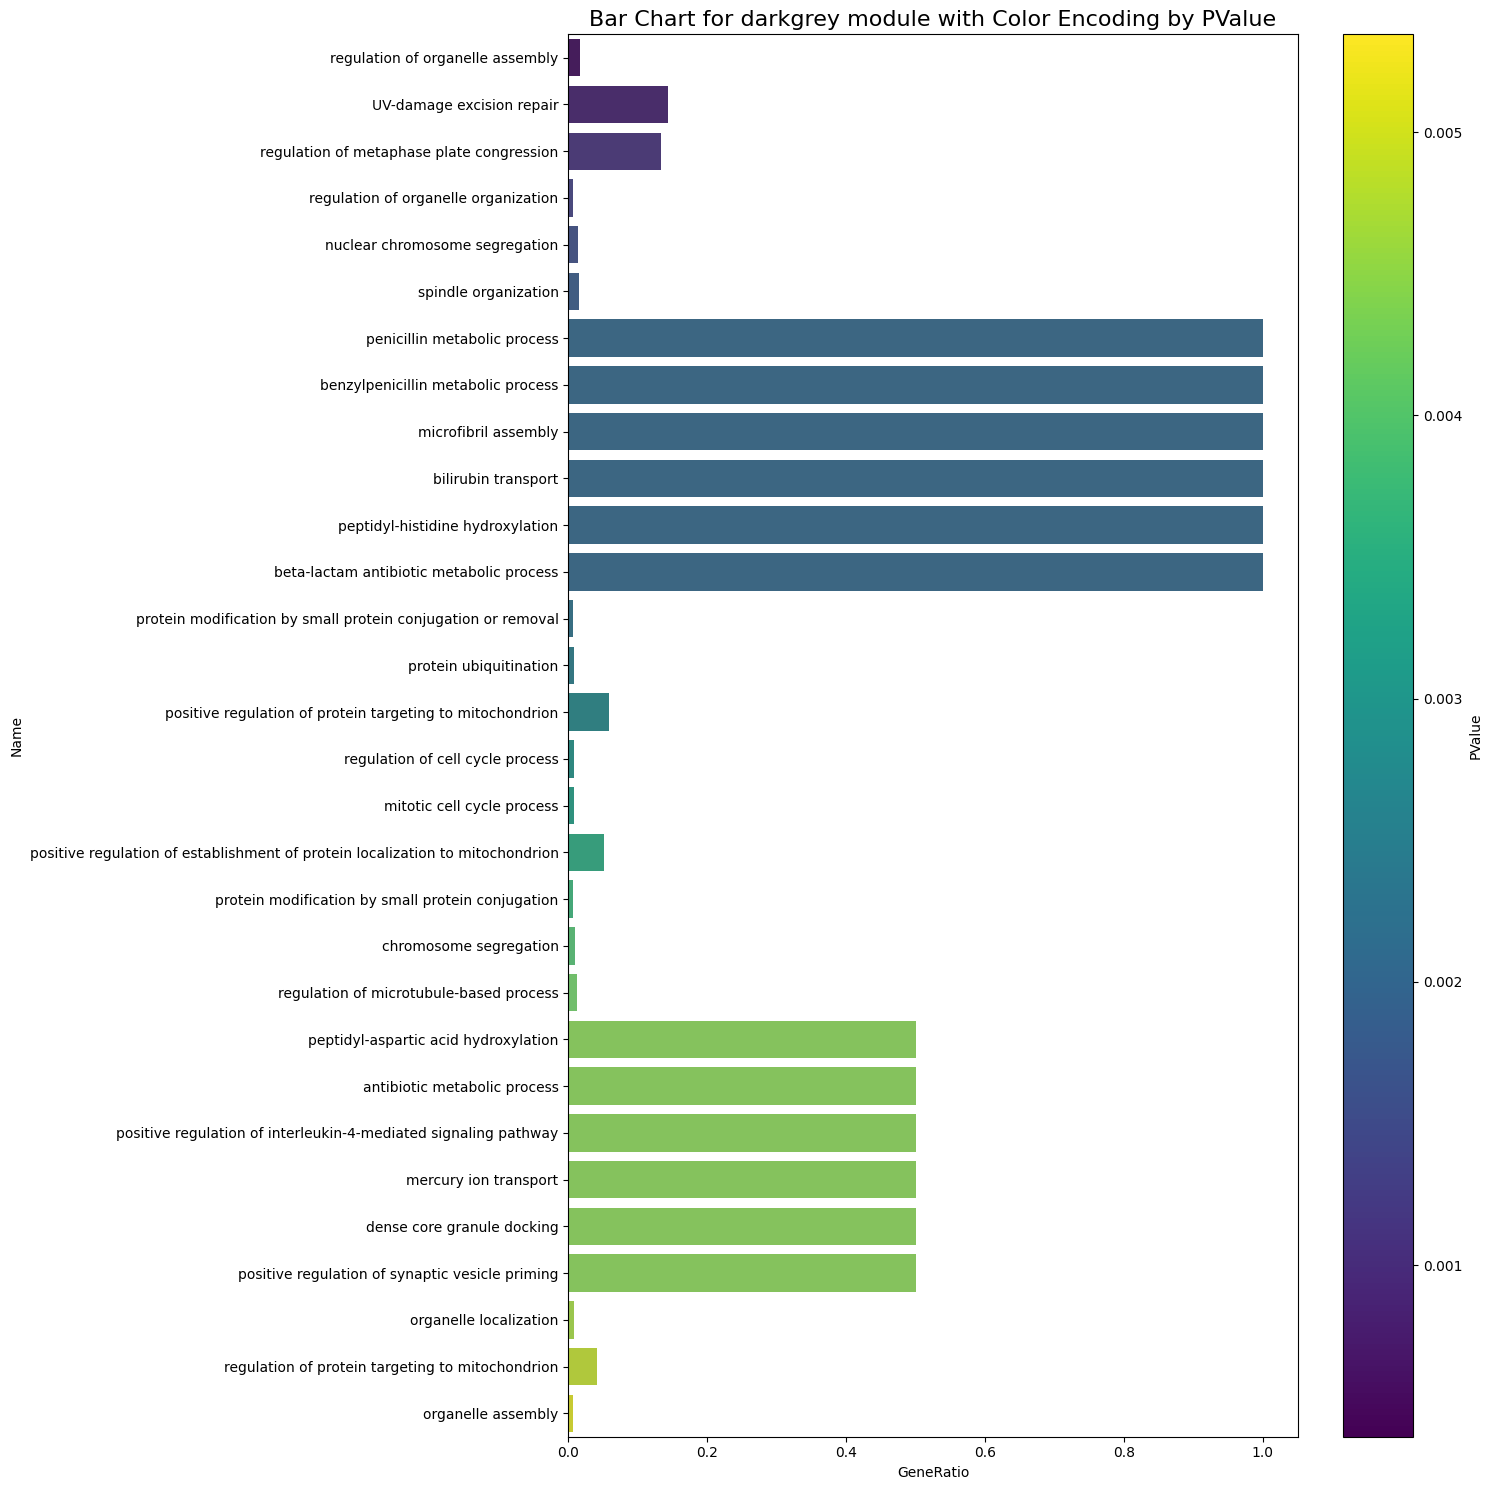

In [75]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'darkgrey'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"darkgrey","LvN")

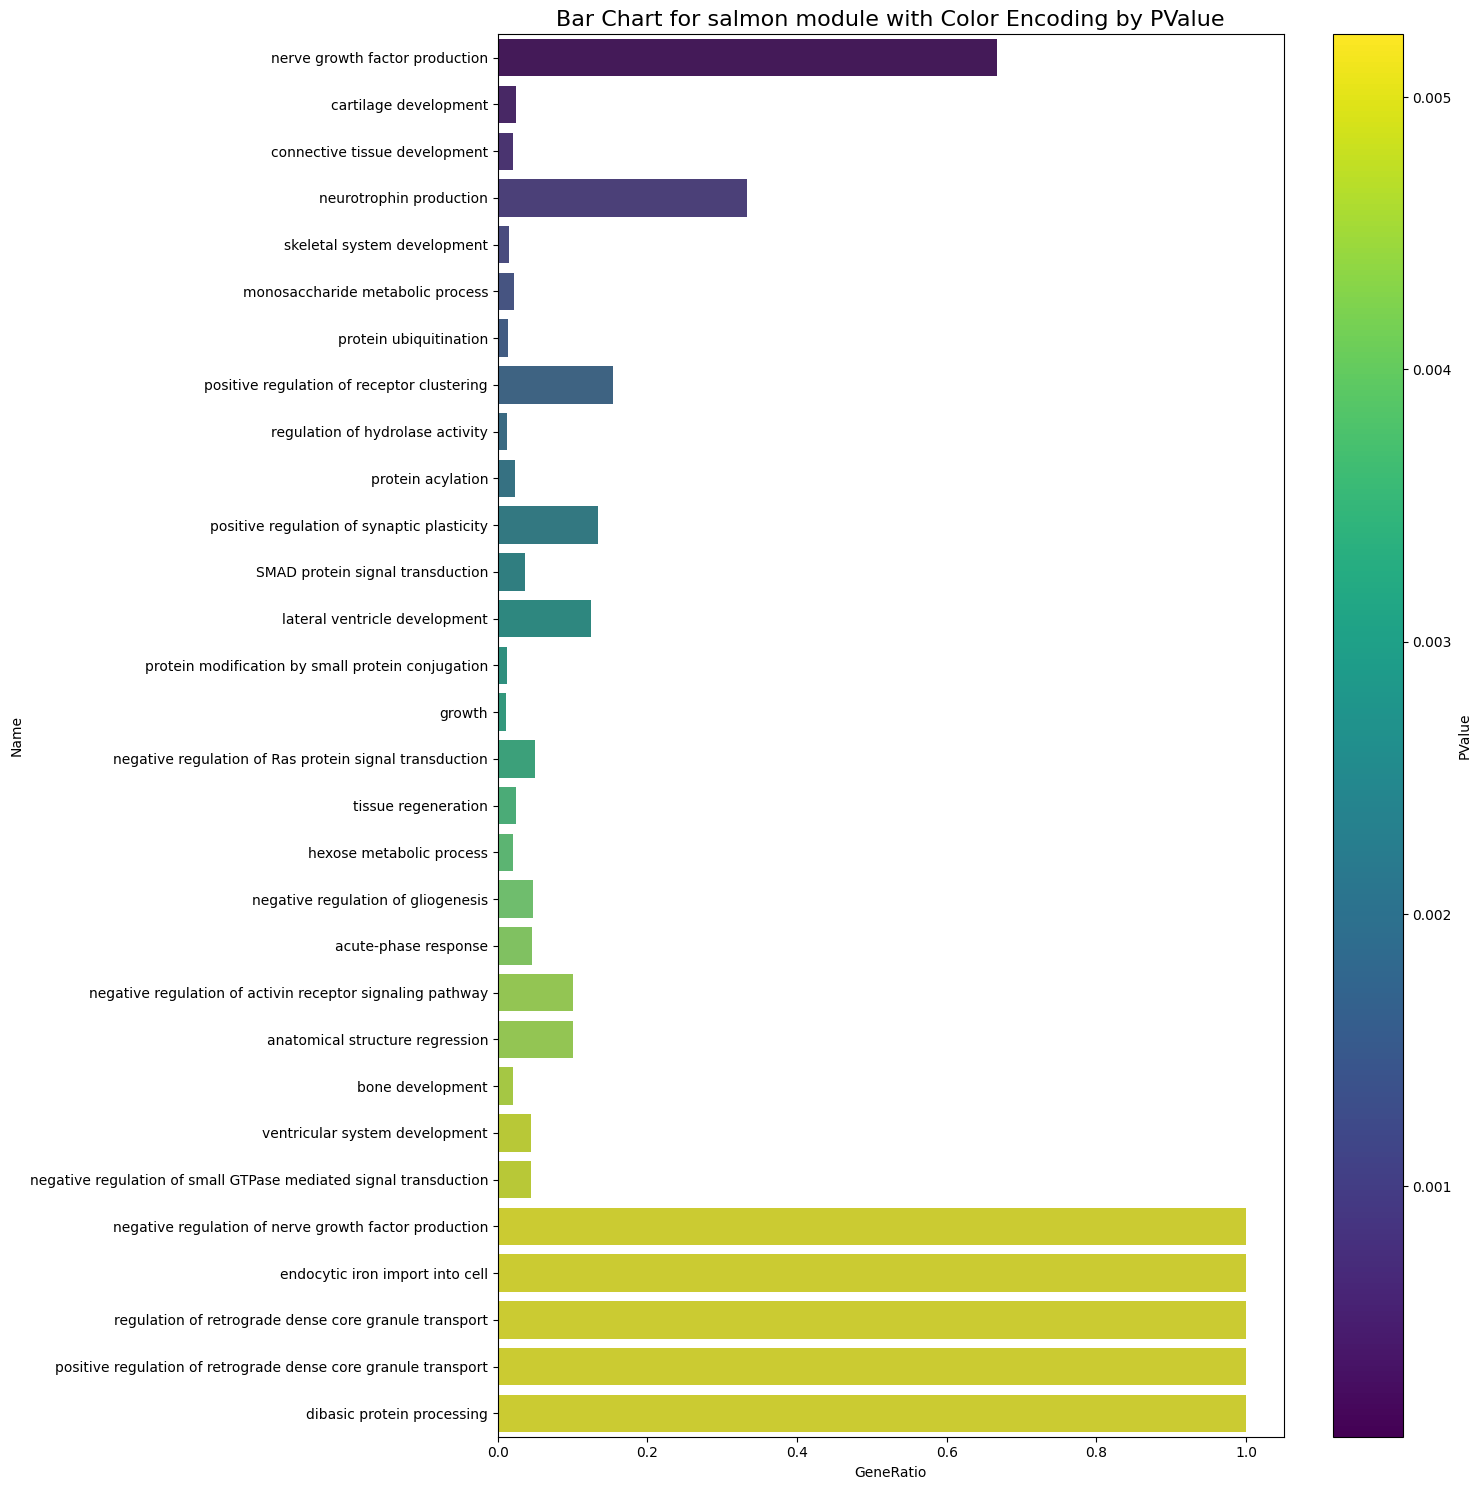

In [76]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'salmon'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"salmon","LvN")

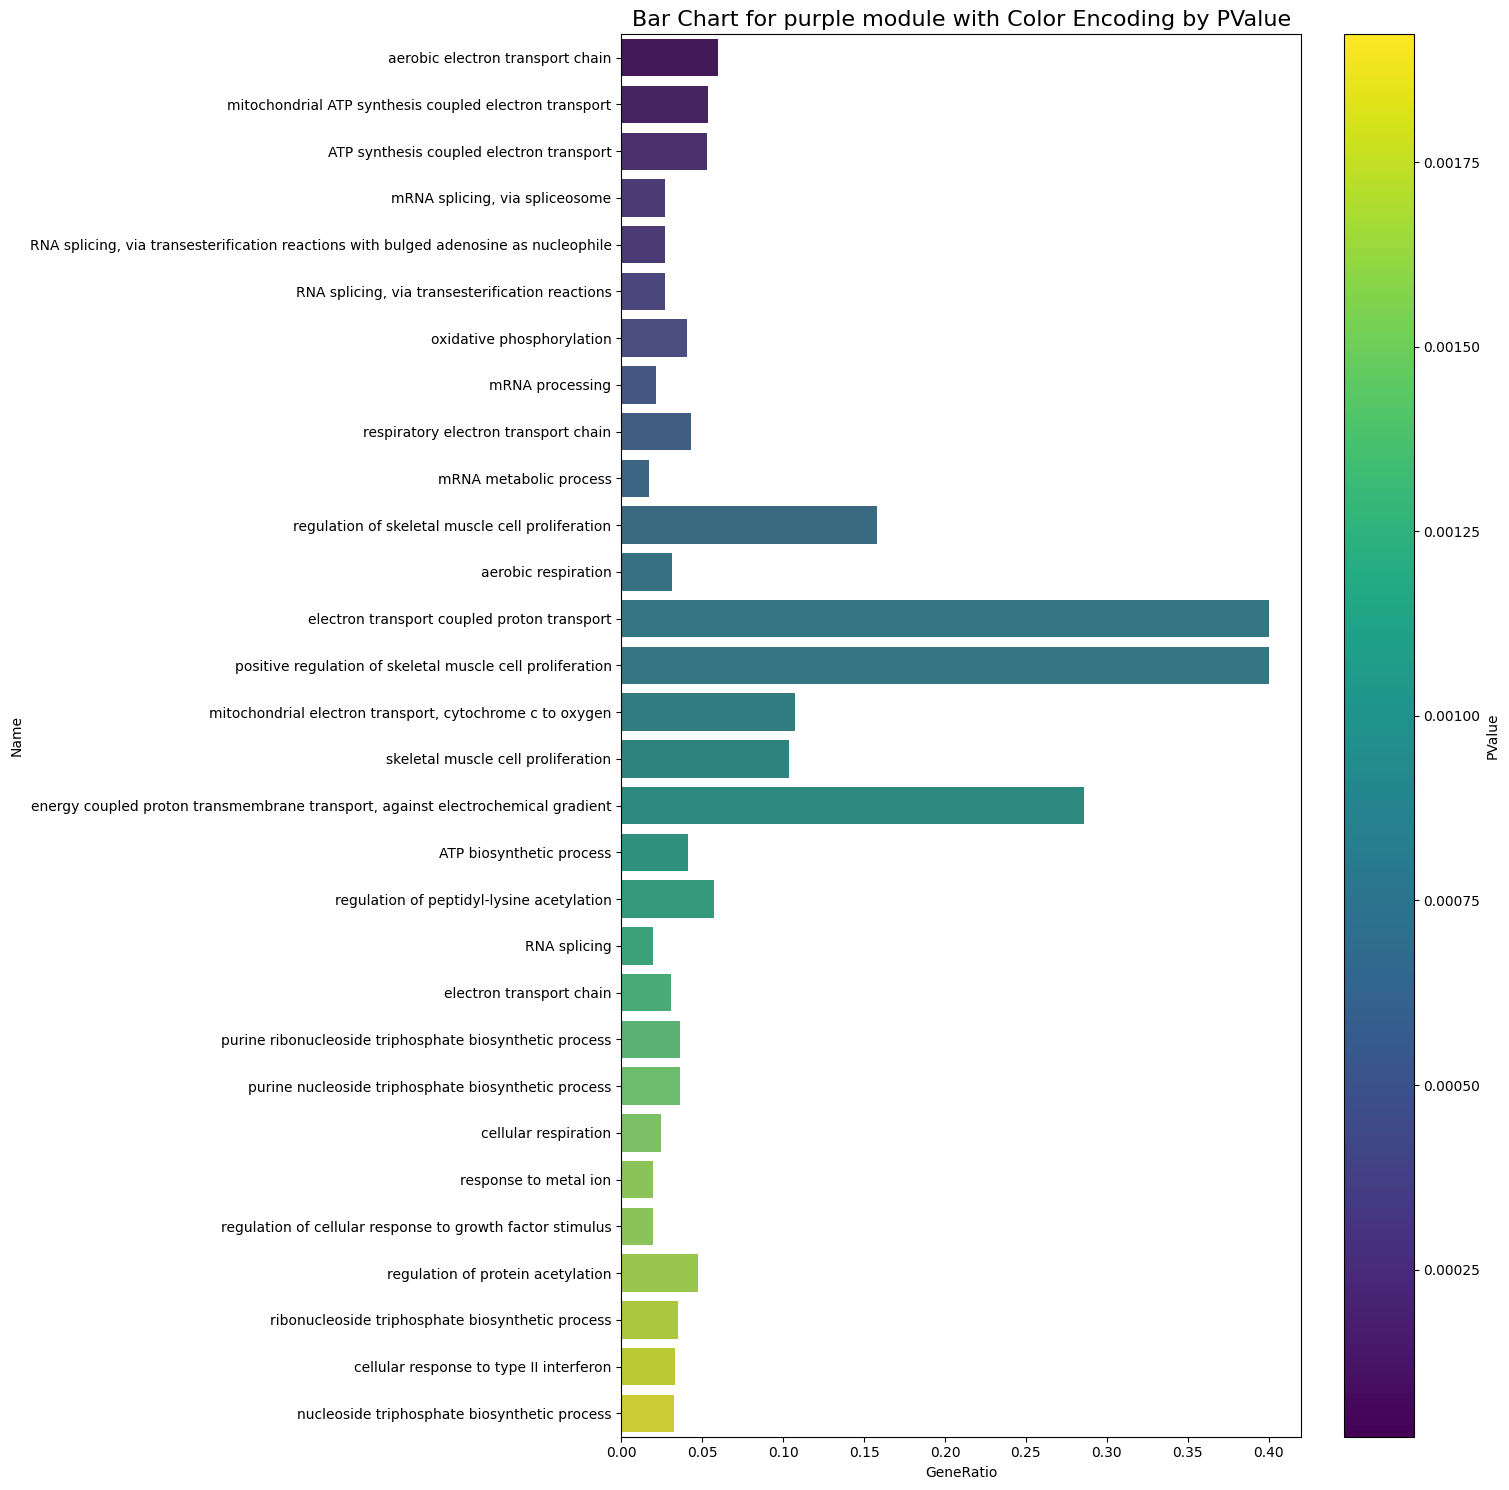

In [78]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'purple'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"purple","LvN")

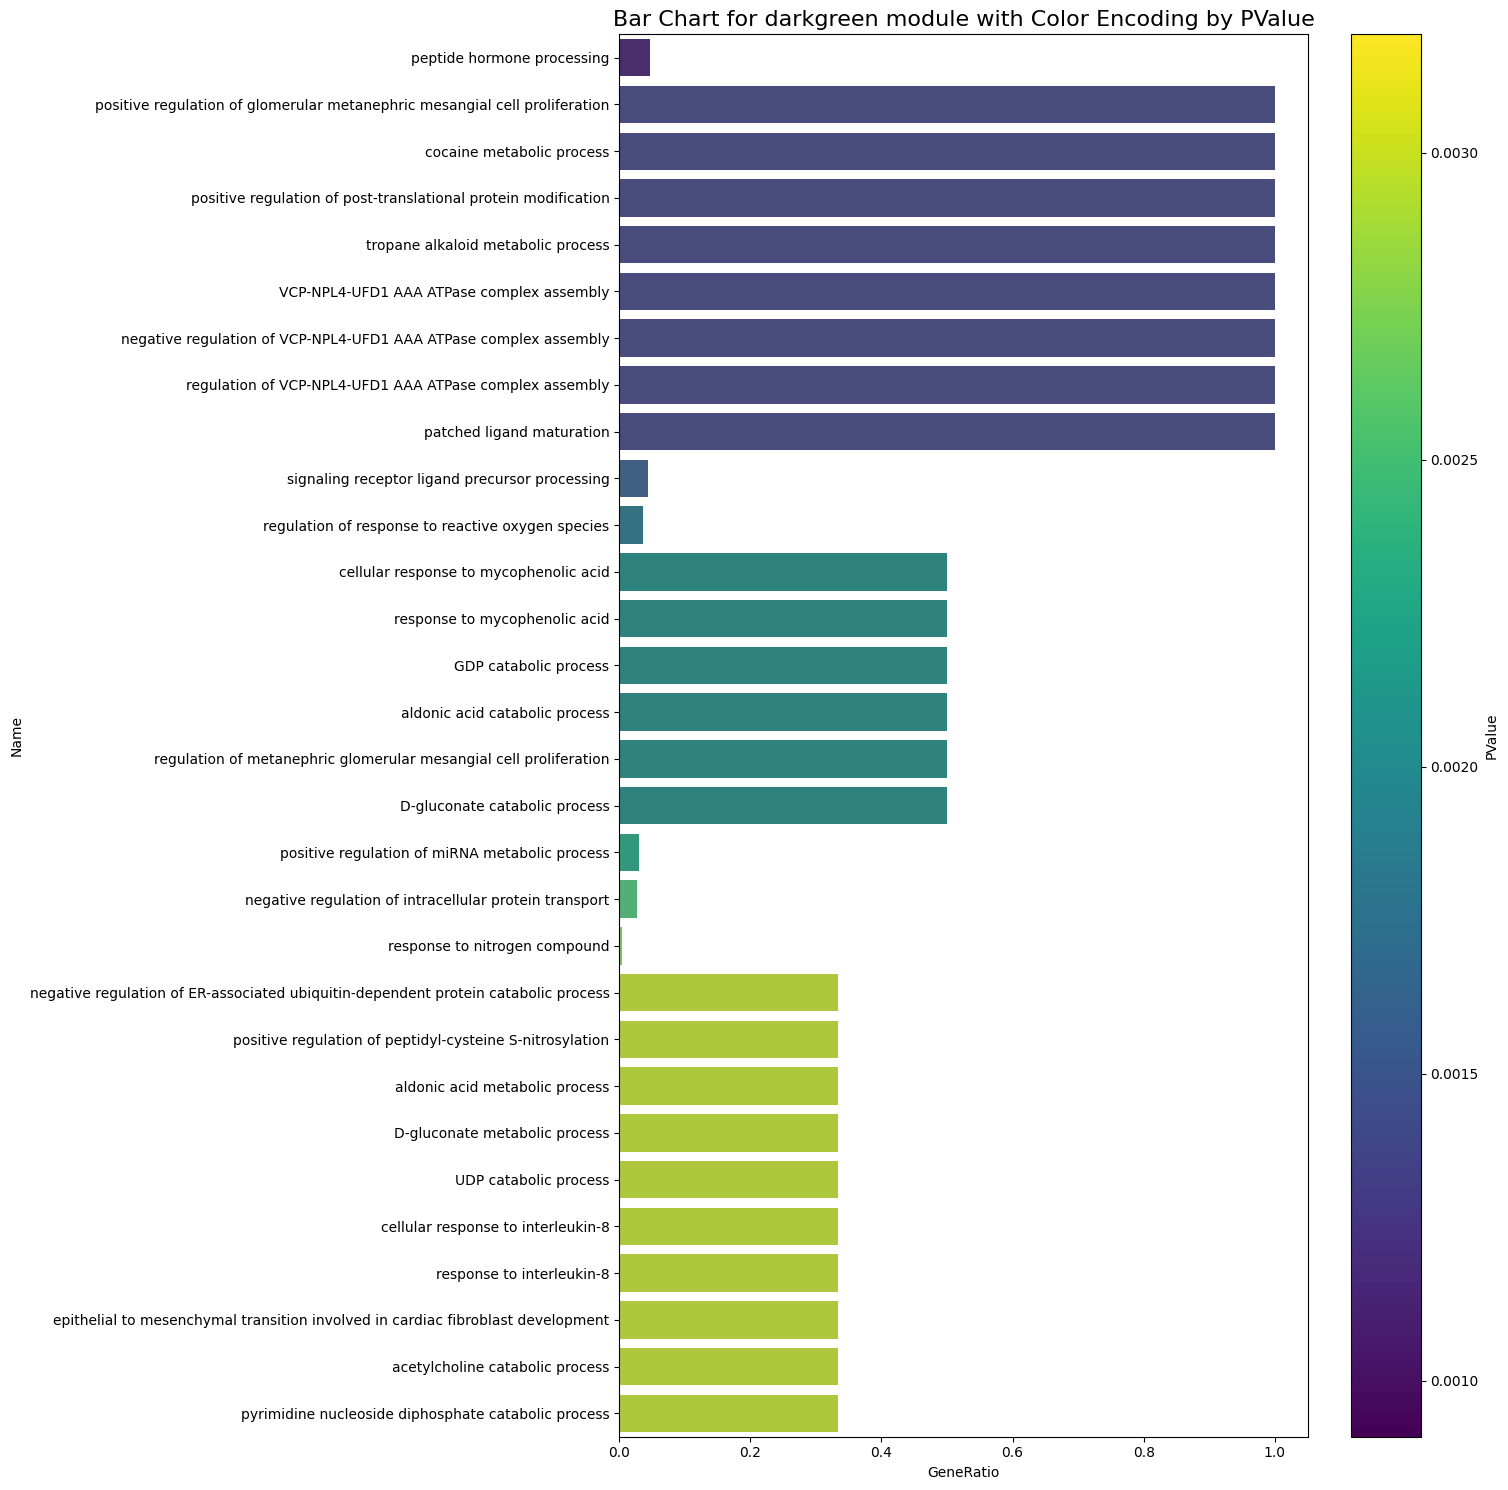

In [79]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'darkgreen'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"darkgreen","LvN")

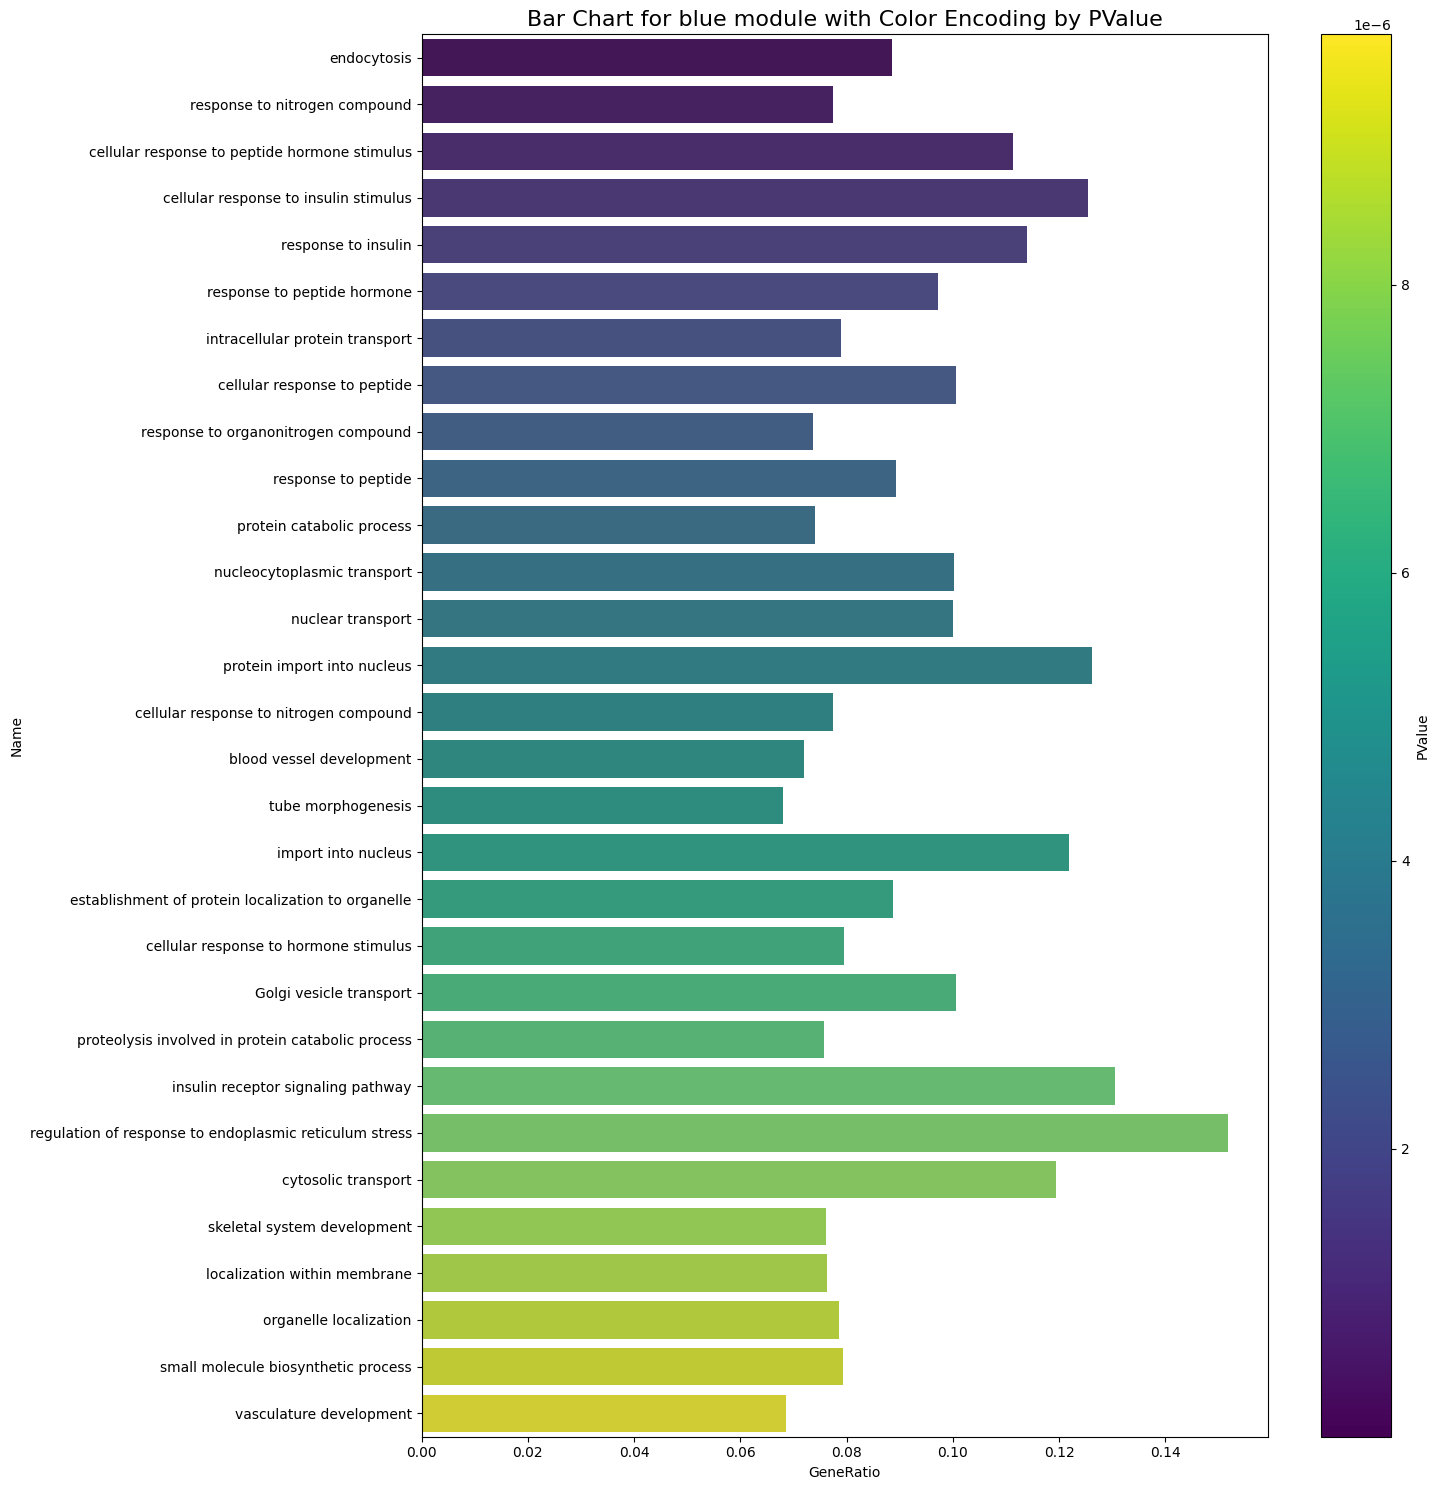

In [80]:
go_yellow = get_GO(get_Entrez(get_gene_name(get_module_genes(df_LvN,'blue'))))
go_yellow['GeneRatio'] = go_yellow["GenesInTermInQuery"]/go_yellow["GenesInTerm"]
create_bargraph(go_yellow.iloc[:30],"blue","LvN")

### H V N

In [46]:
df_HvN = pd.read_csv("module_df_HvN.csv")
# df_HvN = df_HvN.iloc[:,1:]

In [49]:
df_HvN.columns = ["gene_id","colors"]

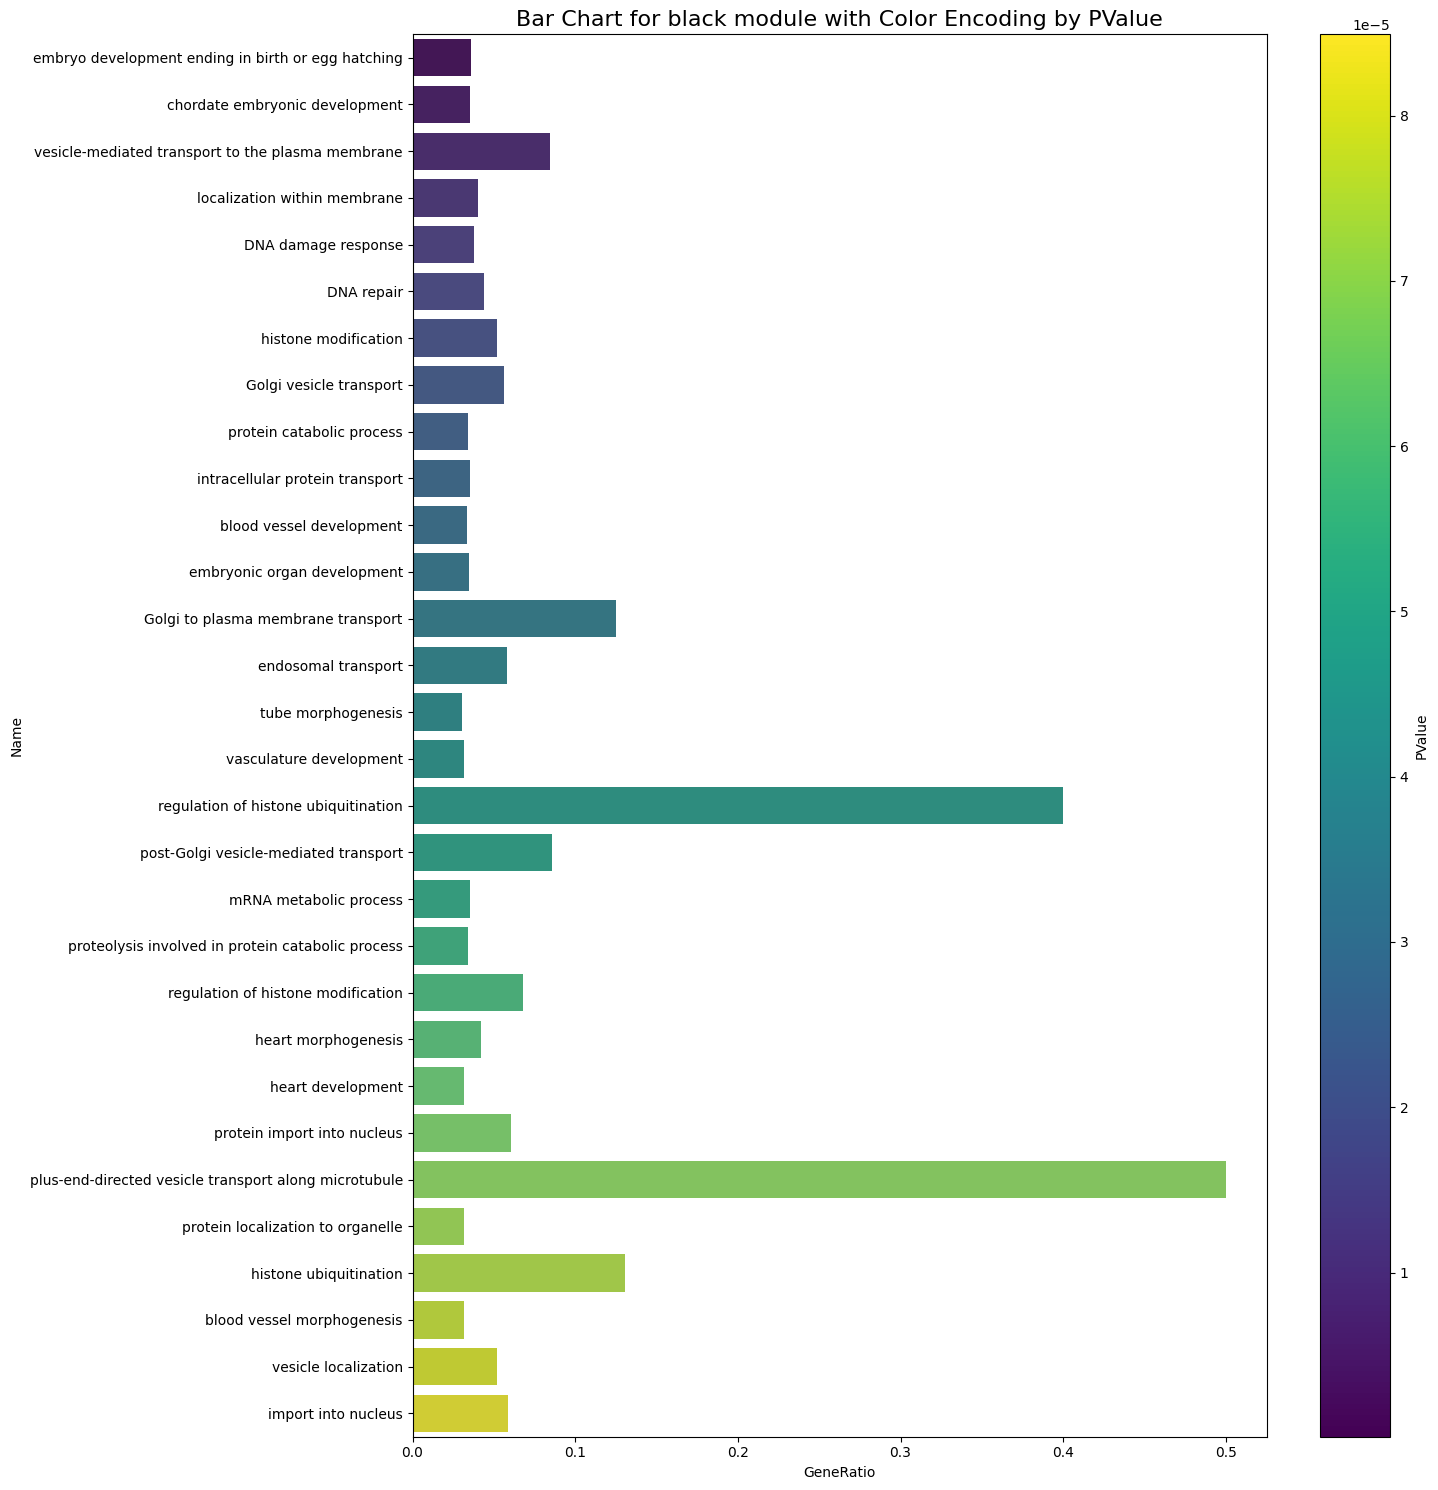

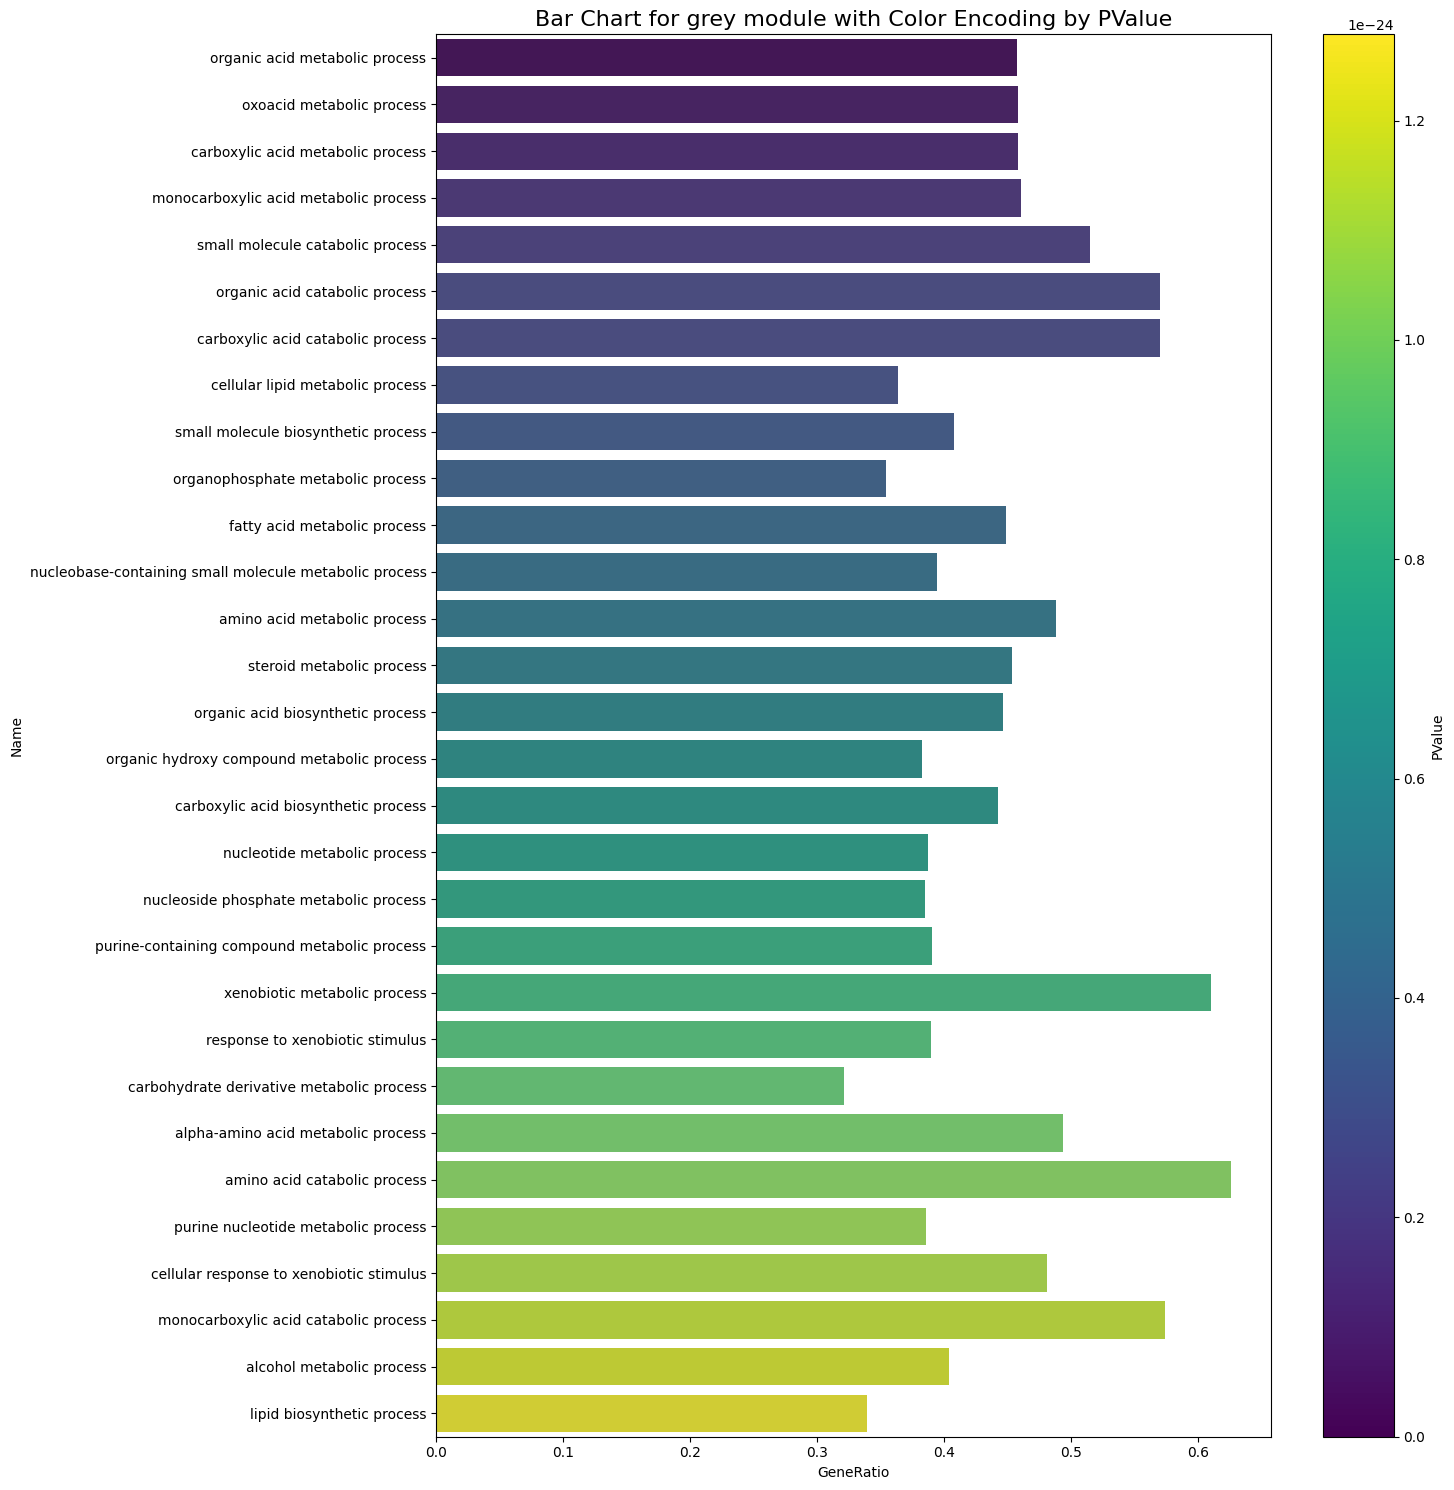

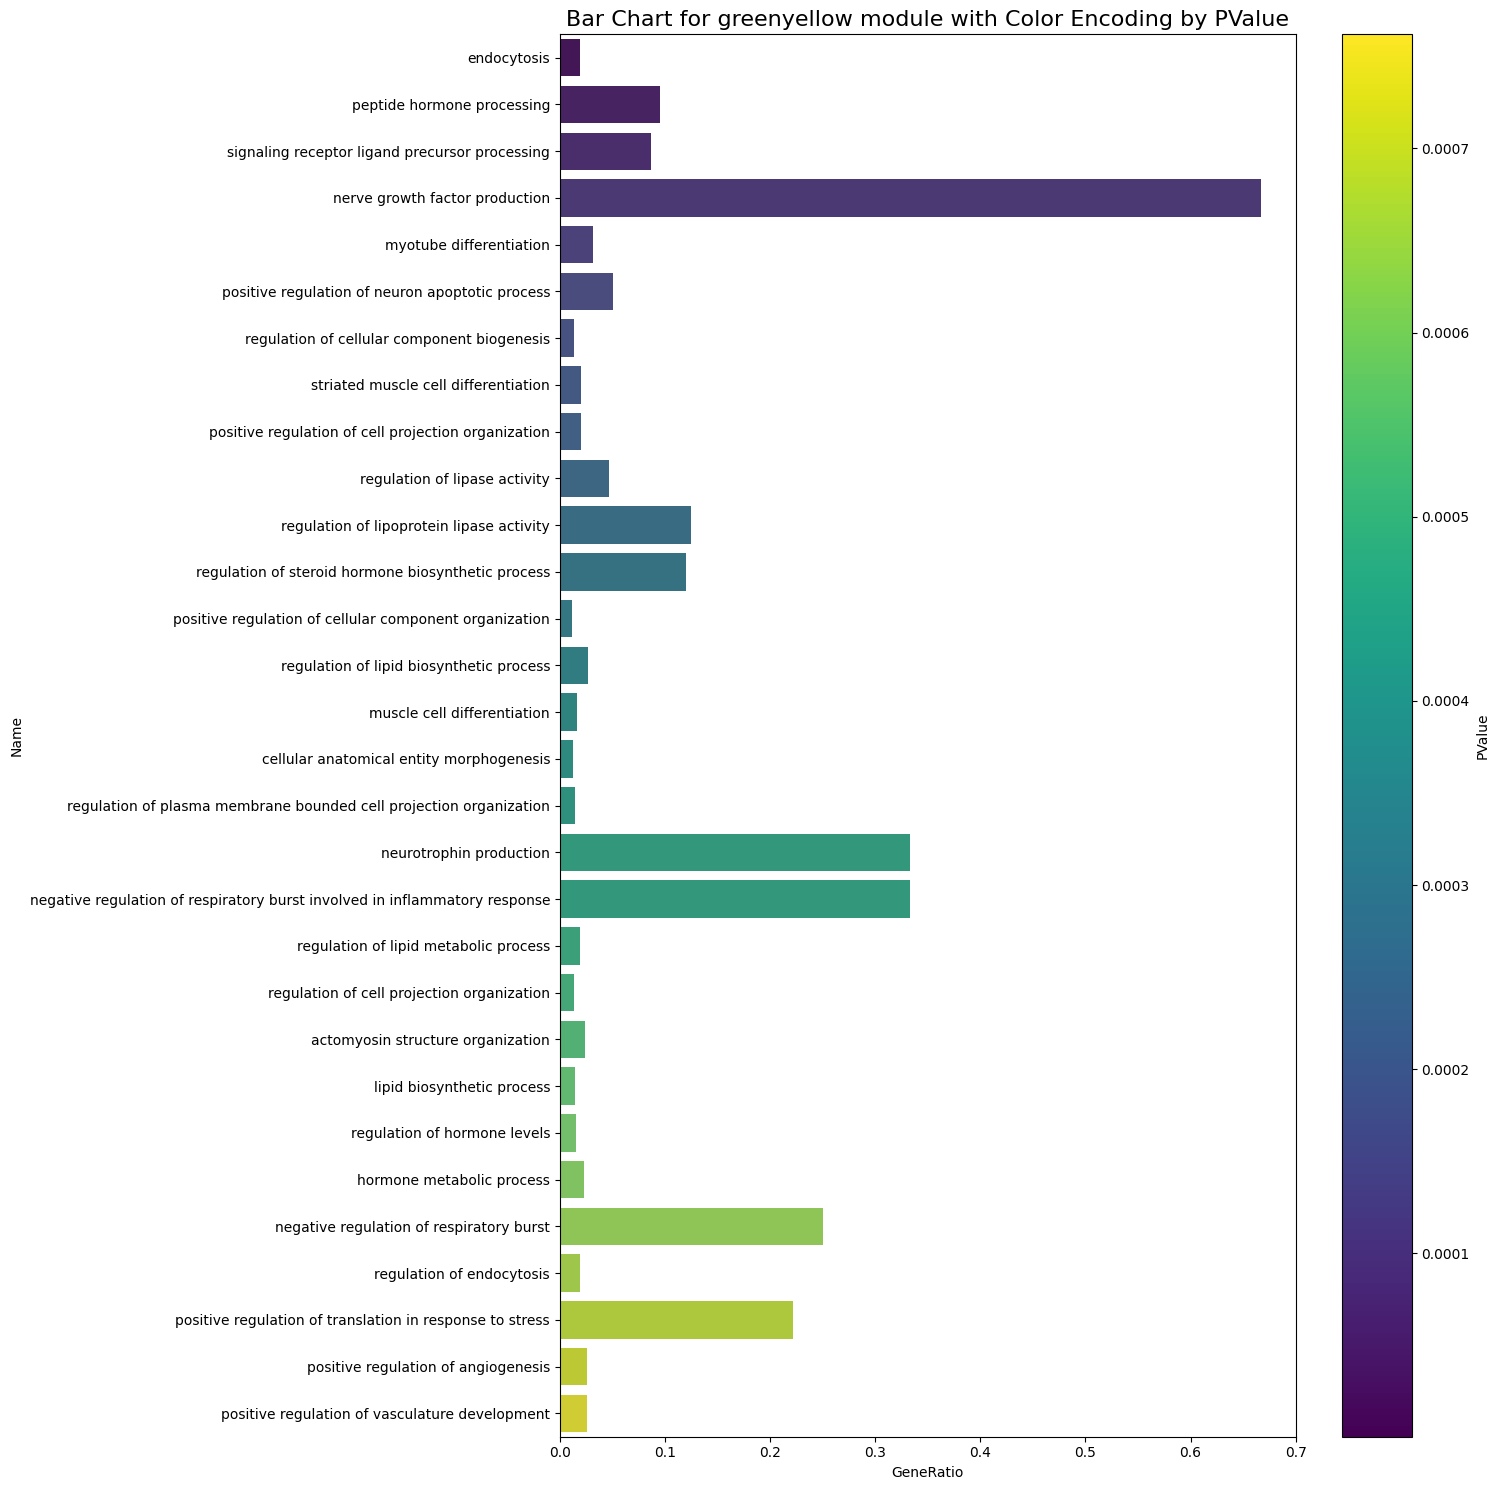

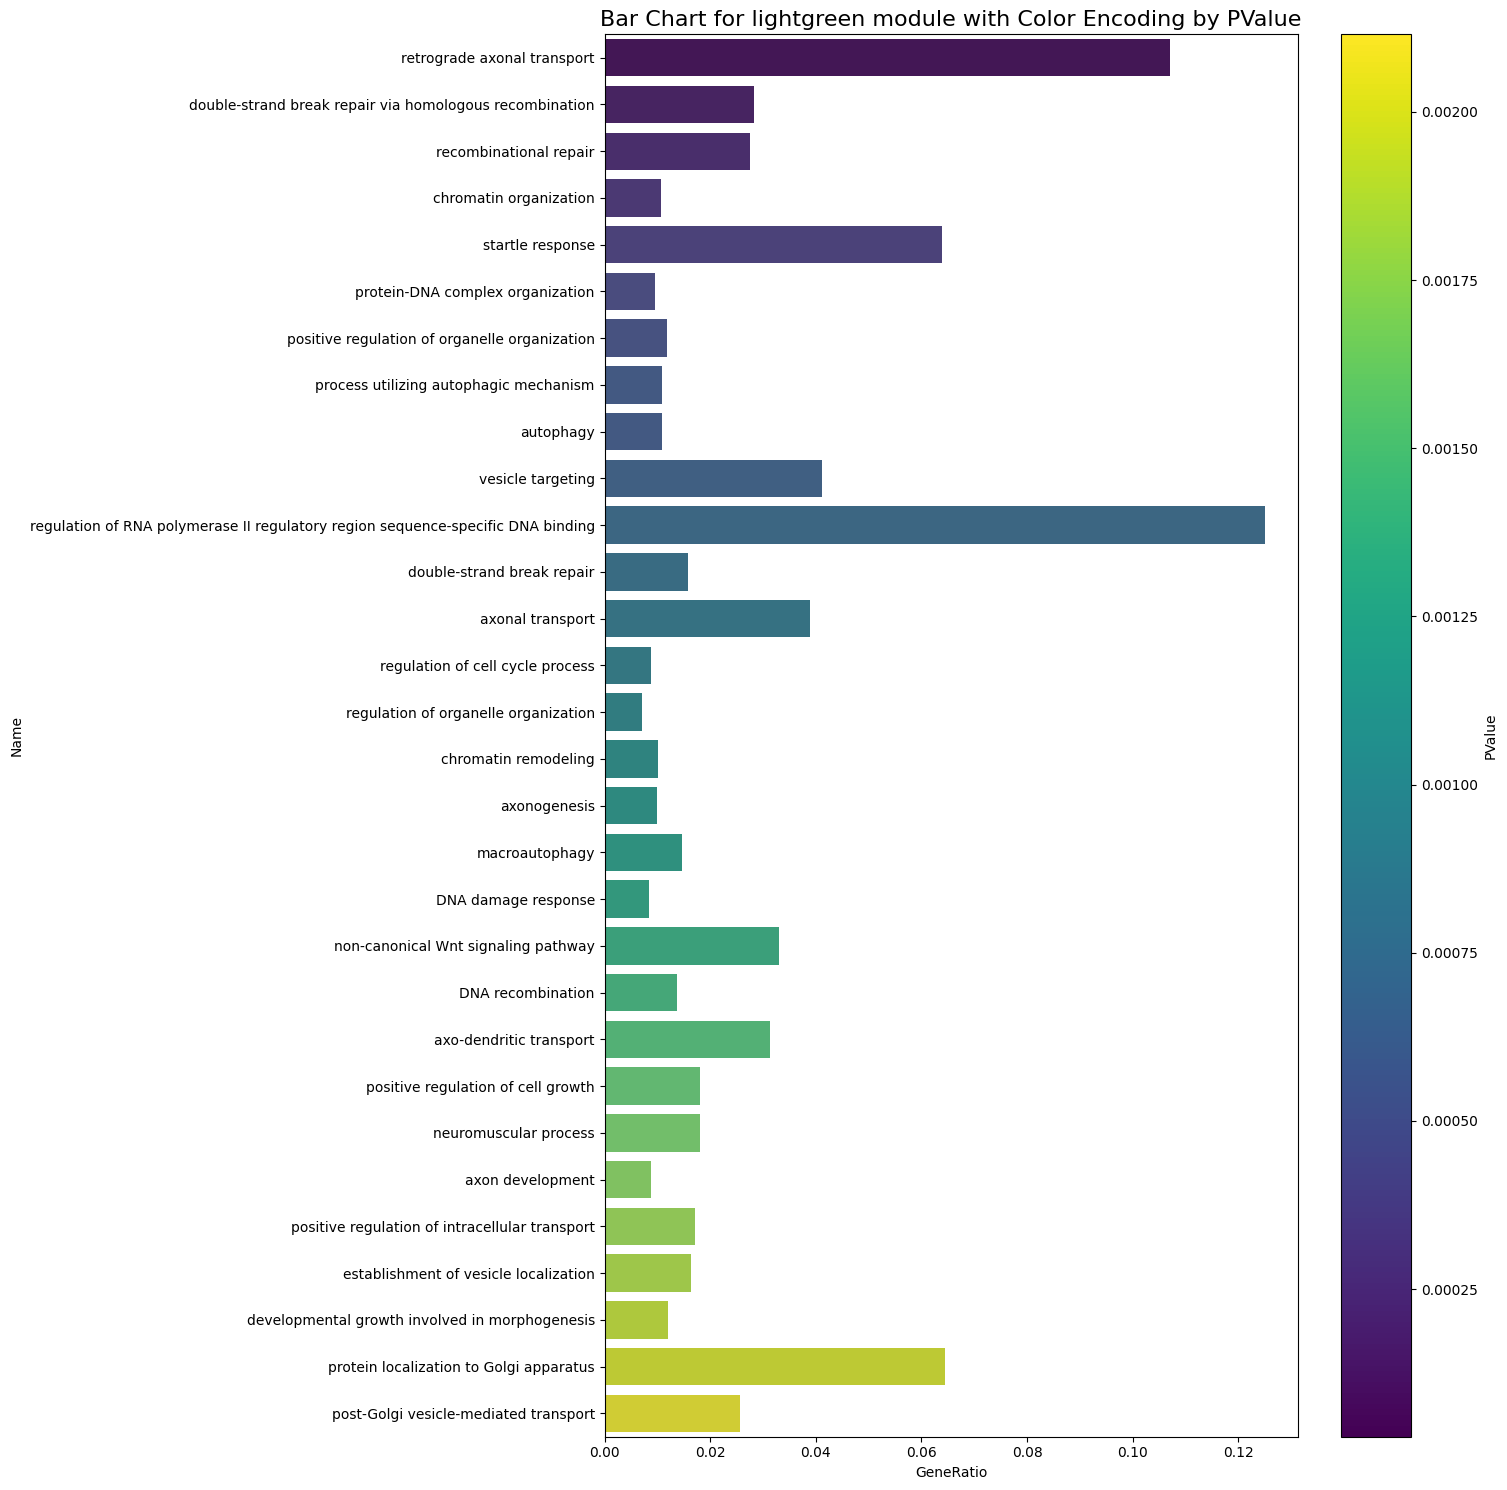

In [81]:
imp_colors = ["black","grey","greenyellow","lightgreen"]

for colors in imp_colors:
    go = get_GO(get_Entrez(get_gene_name(get_module_genes(df_HvN,colors))))
    go['GeneRatio'] = go["GenesInTermInQuery"]/go["GenesInTerm"]
    create_bargraph(go.iloc[:30],colors,"HvN")

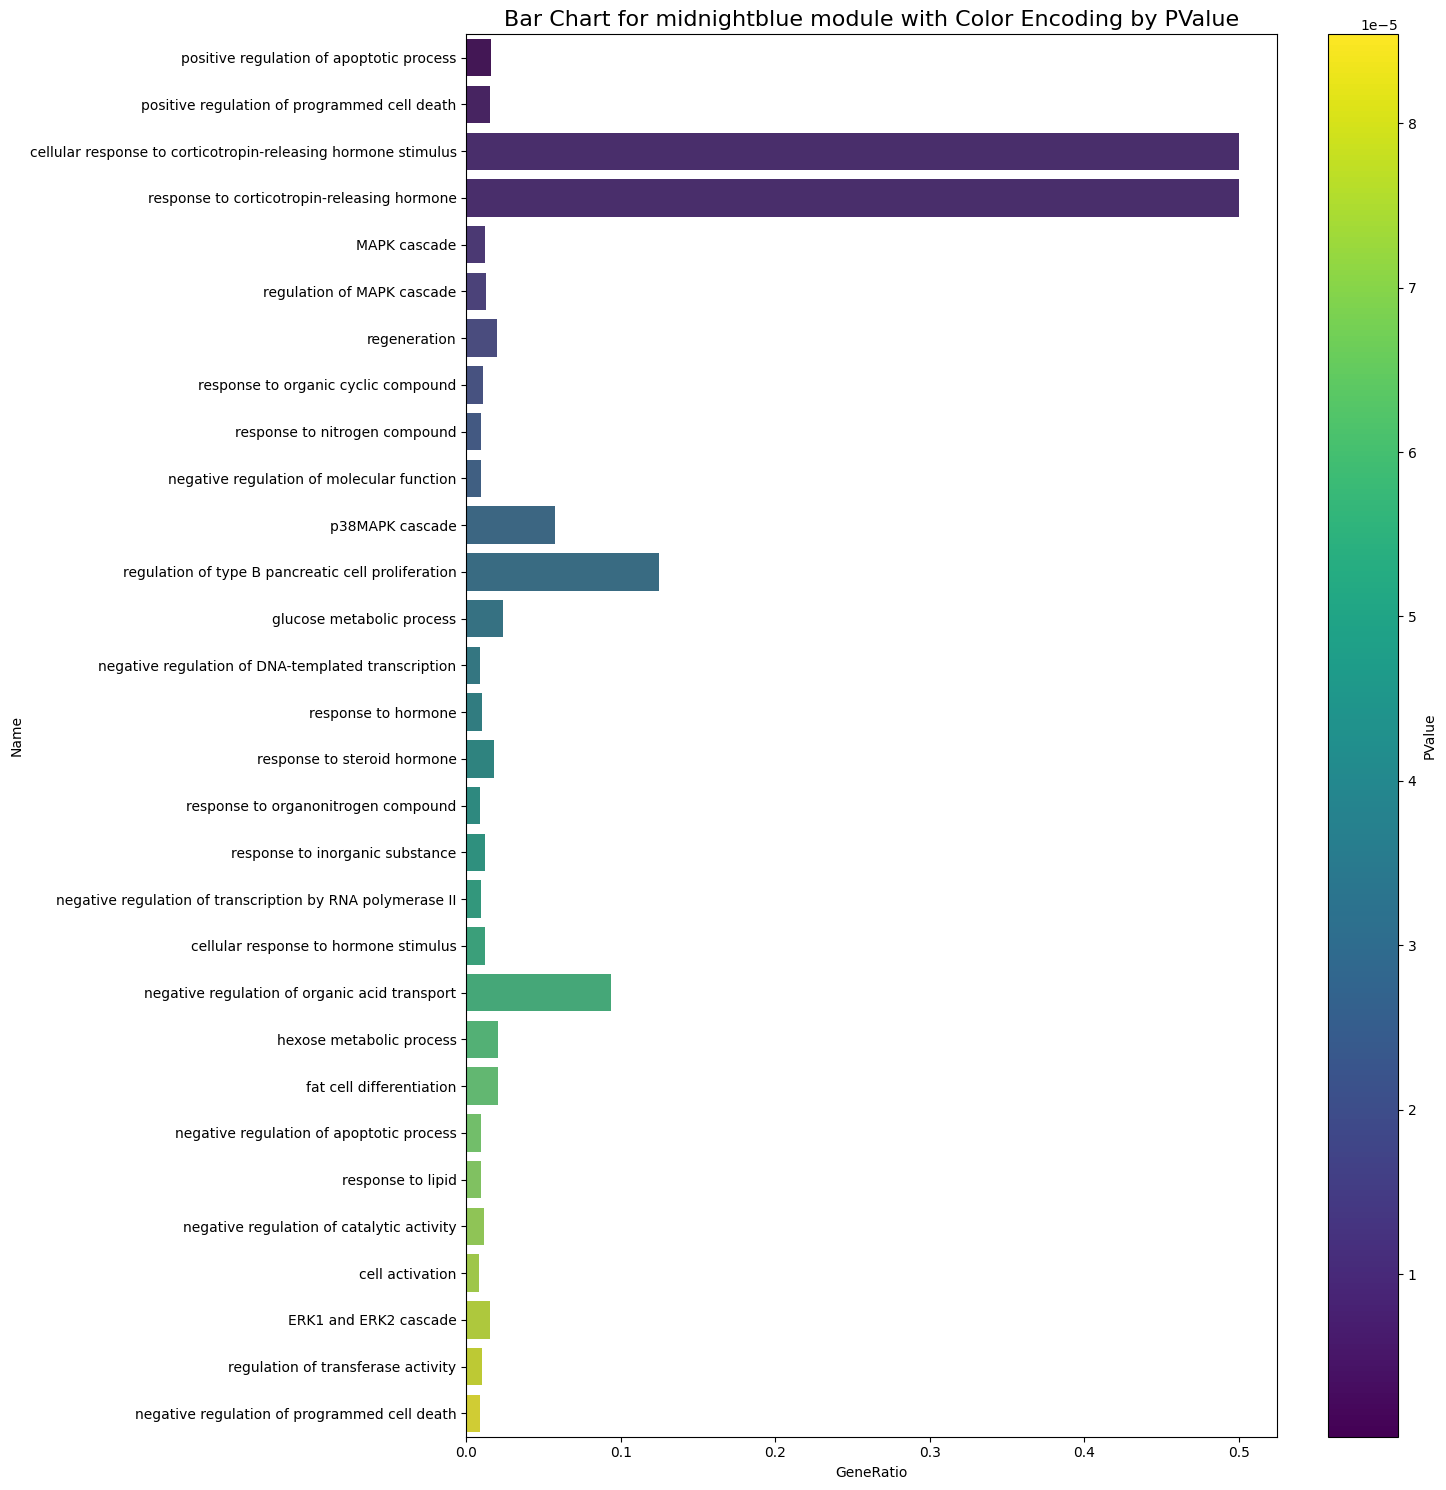

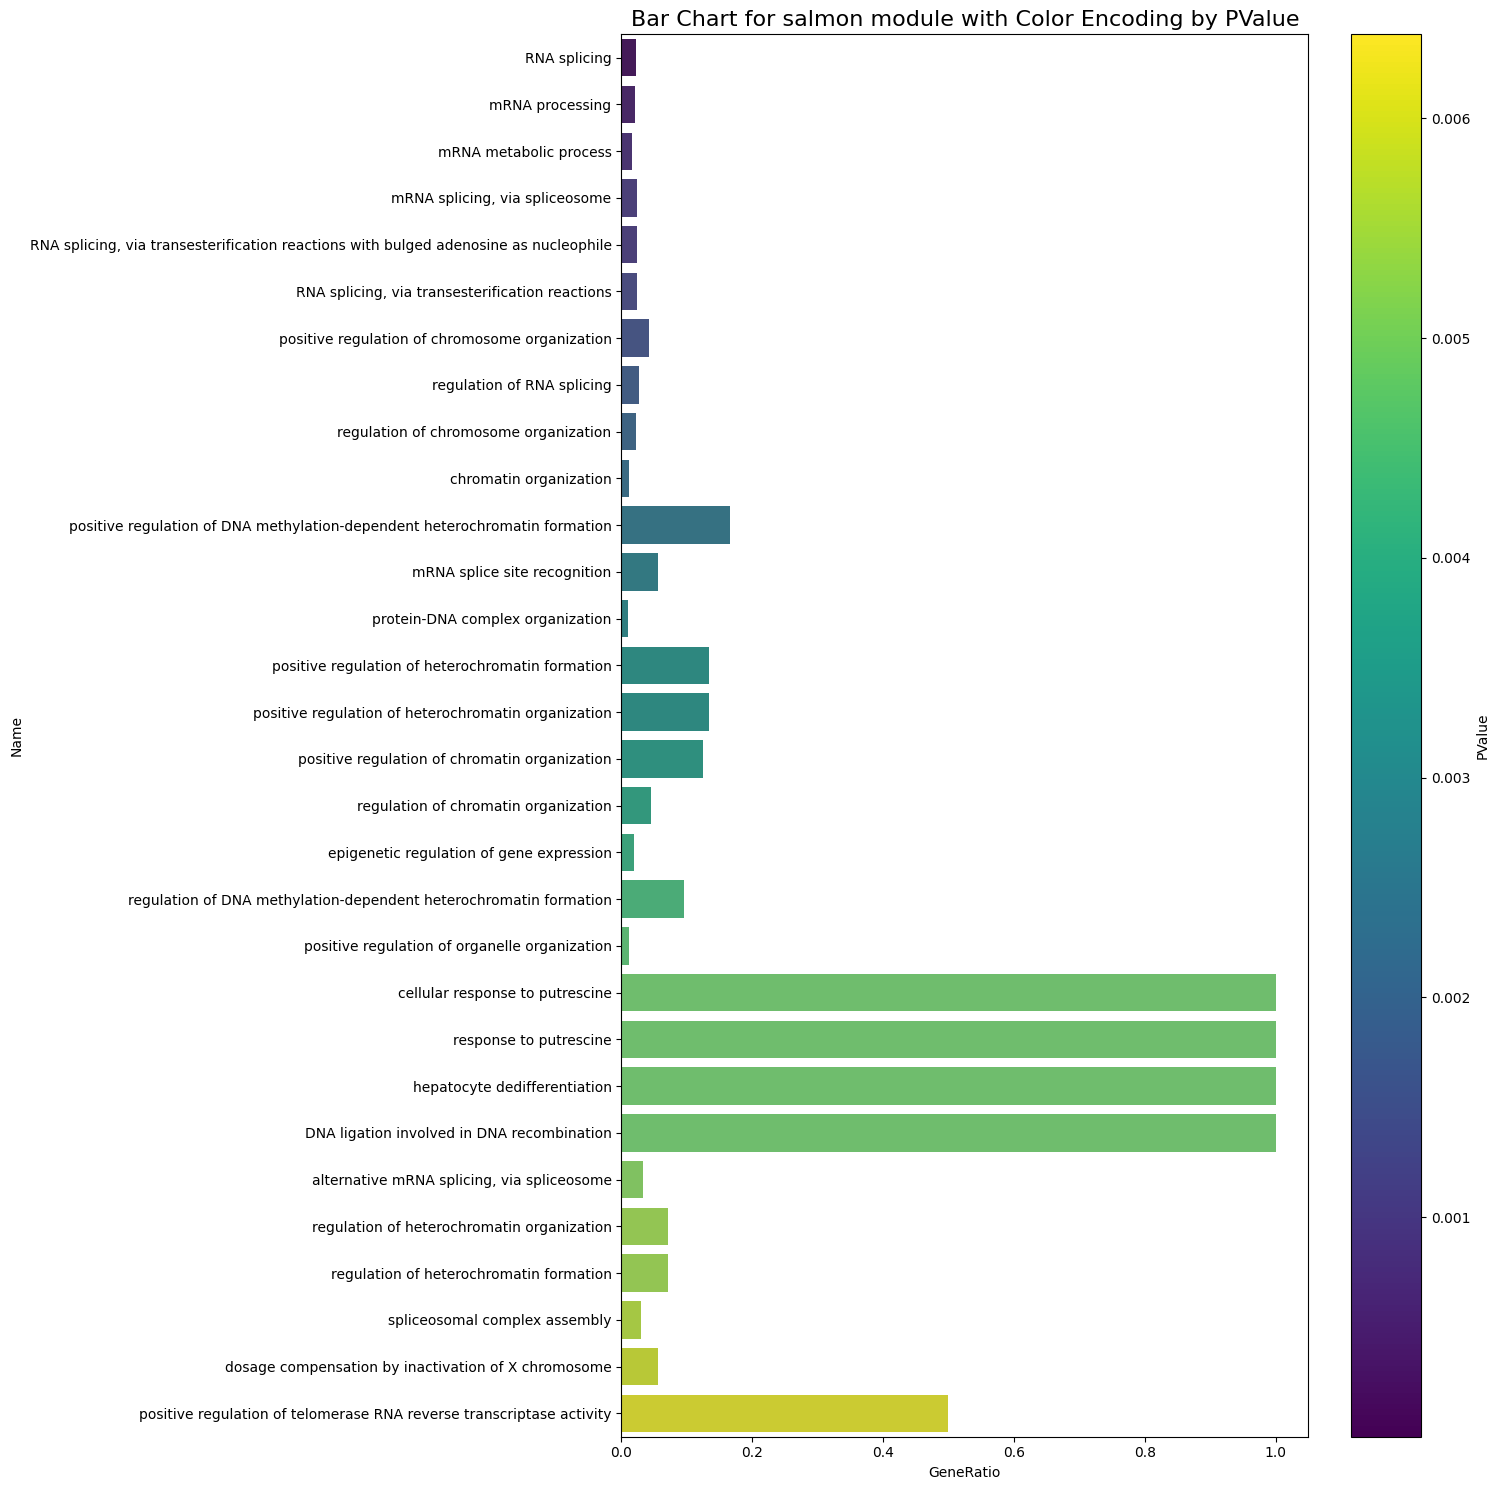

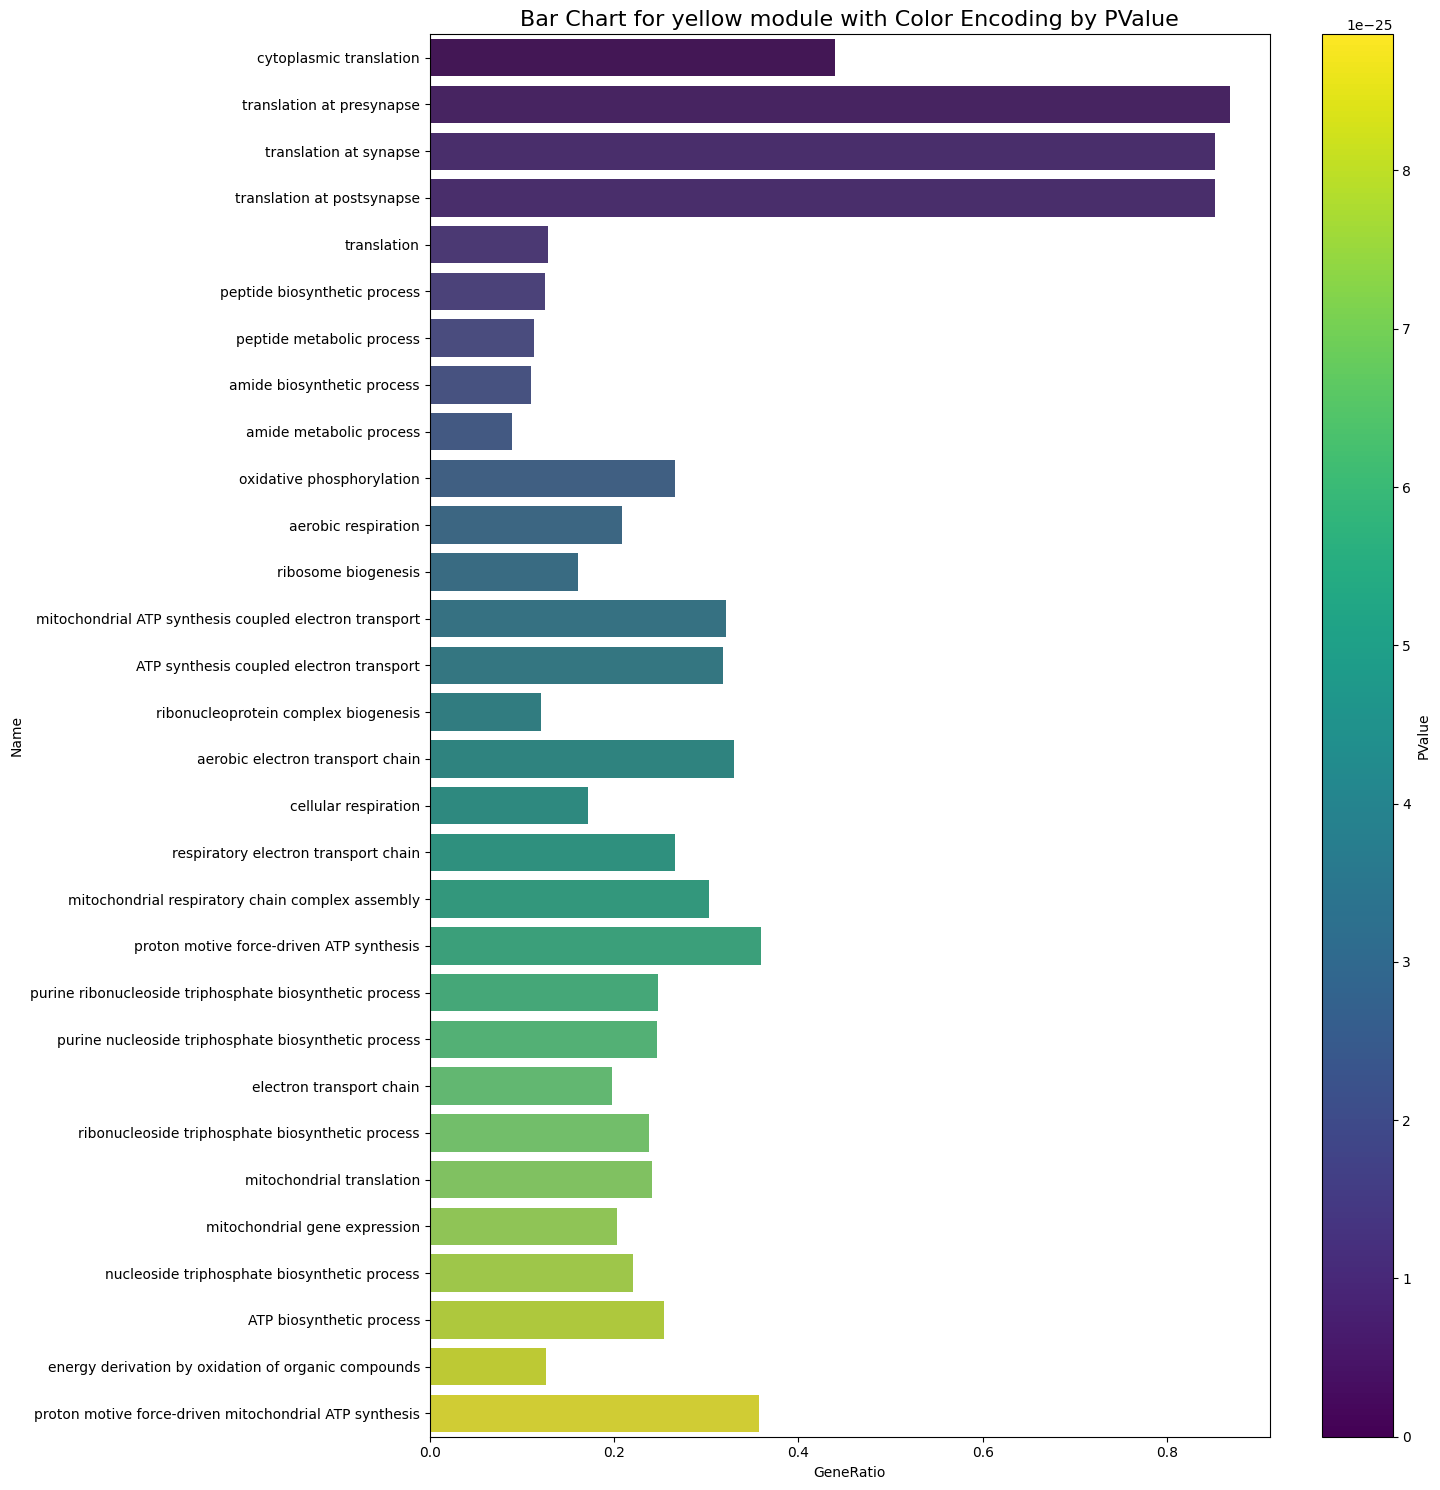

In [83]:
imp_colors = ["midnightblue","salmon","yellow"]

for colors in imp_colors:
    go = get_GO(get_Entrez(get_gene_name(get_module_genes(df_HvN,colors))))
    go['GeneRatio'] = go["GenesInTermInQuery"]/go["GenesInTerm"]
    create_bargraph(go.iloc[:30],colors,"HvN")
    